In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

## Exploring Categories

In [5]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

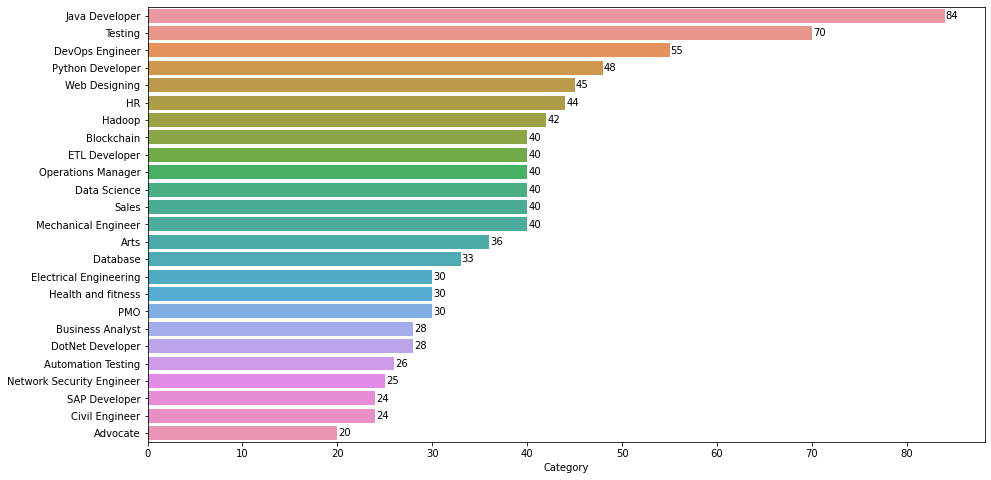

In [6]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=df['Category'].value_counts(), y=df['Category'].value_counts().index)

# Display count values on the bars
for i, count in enumerate(df['Category'].value_counts()):
    ax.text(count + 0.1, i, f'{count}', va='center')

plt.show()

## Exploring Resume

In [7]:
df['Category'][0]

'Data Science'

In [8]:
df['Resume'][110]

"â\x80¢ Good communication skill â\x80¢ Quick learner â\x80¢ Keen to find solutionsEducation Details \r\n MBA Marketing and International Business Management Pune, Maharashtra Pune University\r\n B-Tech Tech Nagpur, Maharashtra RTM Nagpur University\r\nG.M. Arts, Commerce & Science \r\n\r\nG.M. Arts, Commerce & Science\r\nSkill Details \r\nCompany Details \r\ncompany - Samarth College\r\ndescription - of Engineering        30          7        210 \r\n5      College to campus             VJ College of Pharmacy         10 days' workshop       10\r\n\r\nG.M. Arts, Commerce & Science 6          Soft Skills                                               6 days' workshop           6\r\nCollege\r\n\r\nPersonality             G.M. Institute of Agricultural 7\t\t6 days' workshop           6\r\nDevelopment                        Diploma \r\n8          Soft Skills           Samarth College of Polytechnic     20 days' workshop       20\r\n\r\nTOTAL                                              350\

## Cleaning Data

1. URLs
2. Hashtags
3. Mentions
4. Special Characters
5. Punctuations

In [9]:
import re

In [10]:
def cleanResume(txt):
    
    # Removing the links
    cleanTxt = re.sub('http\S+\s', ' ', txt)
    
    # Removing Emails
    cleanTxt = re.sub('@\S+', ' ', cleanTxt)
    
    # Removing hashtags
    cleanTxt = re.sub('#\S+', ' ', cleanTxt)
    
    # Removing RT and cc
    cleanTxt = re.sub('RT|cc', ' ', cleanTxt)
    
    # Removing special characters
    cleanTxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,./<=>?@[\]^_`{|}~"""), ' ',  cleanTxt)
    
    # Removing extra characters
    cleanTxt = re.sub('r[^\x100-\x7f]', ' ', cleanTxt)
    
    # Removing programming sequences
    cleanTxt = re.sub('#\s', ' ', cleanTxt)


    return cleanTxt

In [12]:
df['Clean_Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

## Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
le.fit(df['Category'])
df['Category_Labels'] = le.transform(df['Category'])

In [15]:
df

,Category,Resume,Clean_Resume,Category_Labels
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages: Python pandas...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details \r\nMay 2013 to May 2017 B E...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control Syste...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details \r\n MCA YMCAUST Faridab...,6
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Compute Skills: â¢ Proficient in MS office W...,23
958,Testing,â Willingness to accept the challenges. â ...,â Willingness to a ept the challenges â P...,23
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS â¢ Quick learne â¢ Eagernes...,23
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS-Powe P...,23


## Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [18]:
tfidf.fit(df['Clean_Resume'])
requiredText = tfidf .transform(df['Resume'])

## Train Test Splitting

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category_Labels'], test_size=0.2, random_state=42)

In [25]:
X_train.shape

(769, 7402)

In [26]:
X_test.shape

(193, 7402)

## Model Training

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())

In [34]:
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [36]:
print(accuracy_score(y_test, ypred))

0.9844559585492227


## Prediction System

In [38]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [47]:
myresume = """\â\x80¢ Good communication skill â\x80¢ Quick learner â\x80¢ Keen to find solutionsEducation Details \r\n MBA Marketing and International Business Management Pune, Maharashtra Pune University\r\n B-Tech Tech Nagpur, Maharashtra RTM Nagpur University\r\nG.M. Arts, Commerce & Science \r\n\r\nG.M. Arts, Commerce & Science\r\nSkill Details \r\nCompany Details \r\ncompany - Samarth College\r\ndescription - of Engineering        30          7        210 \r\n5      College to campus             VJ College of Pharmacy         10 days' workshop       10\r\n\r\nG.M. Arts, Commerce & Science 6          Soft Skills                                               6 days' workshop           6\r\nCollege\r\n\r\nPersonality             G.M. Institute of Agricultural 7\t\t6 days' workshop           6\r\nDevelopment                        Diploma \r\n8          Soft Skills           Samarth College of Polytechnic     20 days' workshop       20\r\n\r\nTOTAL                                              350\r\nWORKING EXPERIENCE IN CORPORATE:\r\nSr. No               Topic                      Company                  No. of days    Total Hrs \r\n1       Presentation skill & Team    Elringklinger Automotives Pvt 1 Day           8 building Workshop             Ltd, Ranjangaon, Pune \r\n2           Negotiation skill & Kubler Automation Pvt Ltd., 2 days          16\r\nCommunication skill               Chakan, Pune \r\n3       Business Communication       Finanza Home Loans, Pimple 3 days          21 & Stress management               saudagar, Pune \r\n4        Team-building & Verbal       Sharvari Products Pvt Ltd, 2 days          16 communication                   Junner, Pune 7 days' 5             Entrepreneurship       Agriculture Research Centre,\r\nWorkshop        168\r\nDevelopment               Narayangaon, Pune (8 batches)\r\nTOTAL                                             229\r\n\r\nADJOINING SKILLS: â\x80¢ Working knowledge of Windows operating system and MS Office â\x80¢ Communicate well in English, Hindi & Marathi.\r\nâ\x80¢ Organized and participated in events like gathering, teachers day, fashion show and various science exhibitions at college"""

In [56]:
# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the predictioin using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Mapping Category ID to Category Name
category_mapping = {
    6 : 'Data Science',
    12 : 'HR',
    0 : 'Advocate',
    1 : 'Arts',
    24 : 'Web Designing',
    16 : 'Mechanical Engineer',
    22 : 'Sales',
    14 : 'Health and fitness',
    5 : 'Civil Engineer',
    15 : 'Java Developer',
    4 : 'Business Analyst',
    21 : 'SAP Developer',
    2 : 'Automation Testing',
    11 : 'Electrical Engineering',
    18 : 'Operations Manager',
    20 : 'Python Developer',
    8 : 'DevOps Engineer',
    17 : 'Network Security Engineer',
    19 : 'PMO',
    7 : 'Database',
    13 : 'Hadoop',
    10 : 'ETL Developer',
    9 : 'DotNet Developer',
    3 : 'Blockchain',
    23 : 'Testing'
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category :", category_name)
print(prediction_id)

Predicted Category : Arts
1
